<a href="https://colab.research.google.com/github/javgonzalezvi/AlgorithmsUN2022I/blob/master/Lab13/AlgorithmicToolboxWeek4Group9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Binary Search**

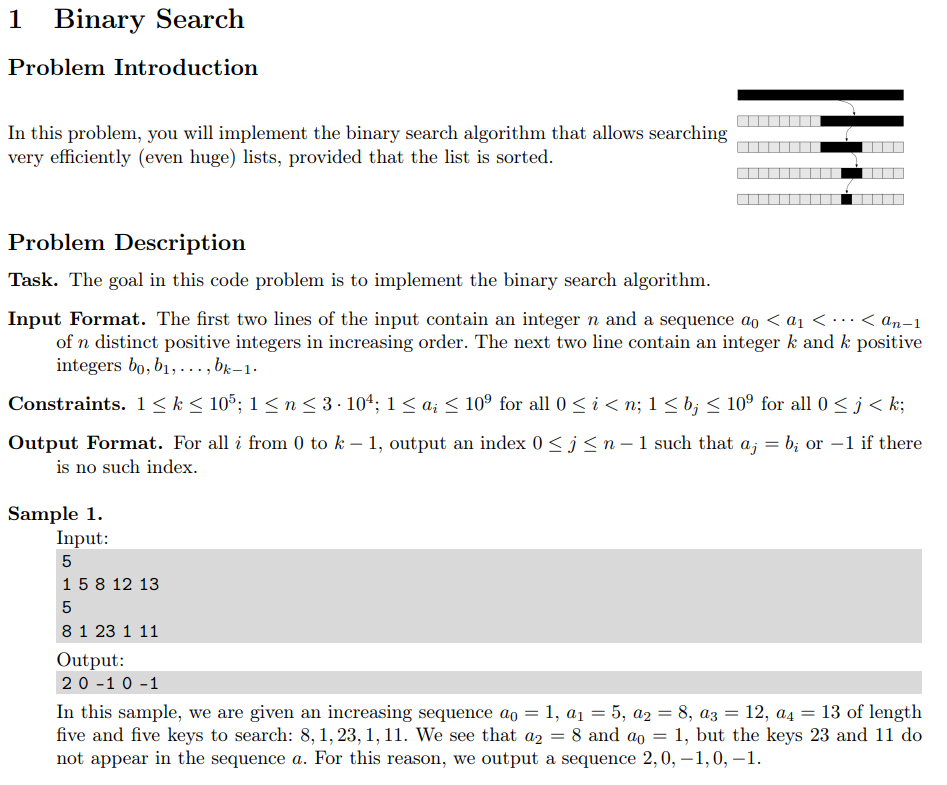

In [21]:
def binarySearch(key, query, low, high):
  
    if high < low:
      return -1
    mid = low + (high-low)//2
    if key == query[mid]:
      return mid
    elif key < query[mid]:
      return binarySearch(key, query, low, mid-1)
    else:
      return binarySearch(key, query, mid+1, high)
    return -1

In [22]:
n = 5
a = [1, 5, 8, 12, 13]
k = 5
b = [8, 1, 23, 1, 11]

result = []

for x in b:
  result.append(binarySearch(x, a, 0, len(a)-1))

print(result)

[2, 0, -1, 0, -1]


# **2. Binary Search with Duplicates**

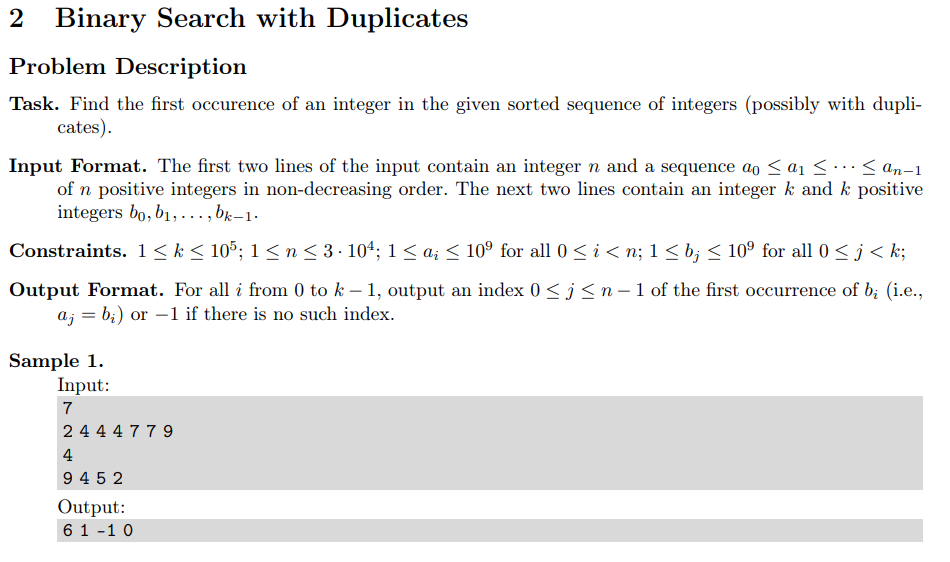

In [19]:
def binarySearch(key, query, low, high):
    
    if high < low:
      return -1
    mid = low + (high-low)//2
    if key == query[mid]:
      if mid-1 < 0:
        return mid
      if query[mid-1] != key:
        return mid
      return binarySearch(key, query, low, mid-1)
    elif key < query[mid]:
      return binarySearch(key, query, low, mid-1)
    else:
      return binarySearch(key, query, mid+1, high)
    return -1

In [20]:
n = 7
a = [2, 4, 4, 4, 7, 7, 9]
k = 4
b = [9, 4, 5, 2]

result = []

for x in b:
  result.append(binarySearch(x, a, 0, len(a)-1))

print(result)

[6, 1, -1, 0]


# **3. Majority Element**

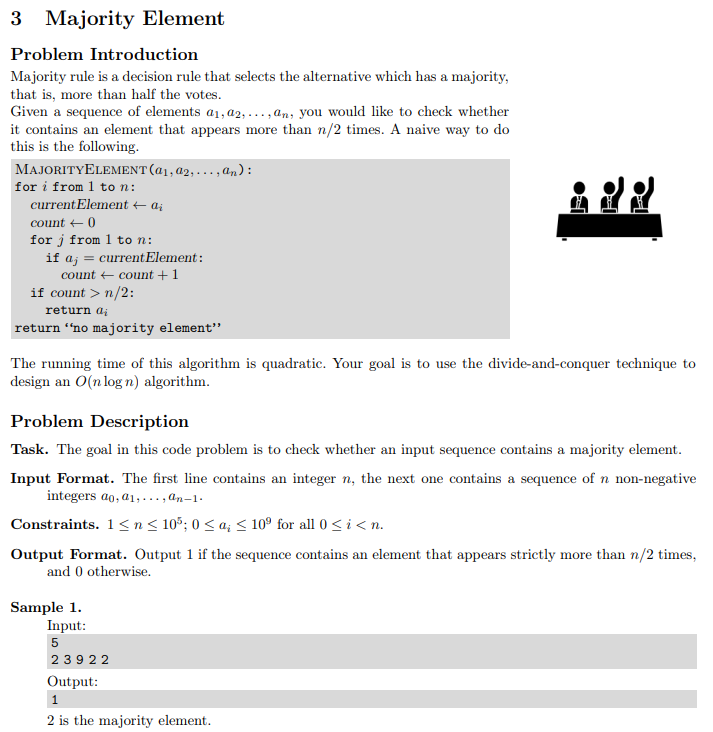

In [17]:
def majorityElement(seq, l, r):

    if l+1==r:
        return seq[l]
    elif l+2==r:
        return seq[l]
    m = (l+r)//2
    
    left = majorityElement(seq, l, m)
    right = majorityElement(seq, m, r)

    c1, c2 = 0, 0

    for i in seq[l:r]:
        
        if i == left:
            c1+=1
        elif i == right:
            c2+=1
    
    if c1>(r-l)//2 and left != -1:
        return left
    elif c2>(r-l)//2 and right != -1:
        return right
    else: 
        return -1

In [18]:
n = 5
arr = [2, 3, 9, 2, 2]

if majorityElement(arr, 0, n) != -1:
        print(1)
else:
        print(0)

1


#**4. Improving QuickSort**


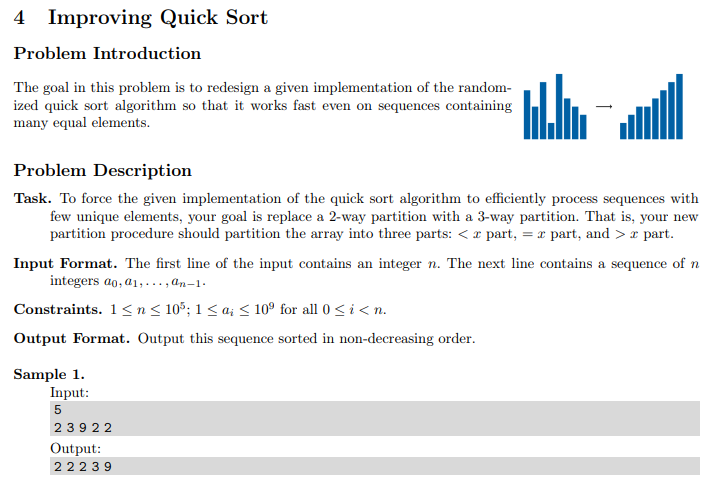

In [14]:
def partition(arr, low, high):

    i = (low-1)         
    pivot = arr[high]    
 
    for j in range(low, high):
 
        if arr[j] <= pivot:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    
    return (i+1)

In [15]:
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, low, high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
        

In [16]:
n = 5
arr = [2, 3, 9, 2, 2]

quickSort(arr, 0, len(arr)-1)

for i in range(n):
    print(arr[i], end=' ')

2 2 2 3 9 

# **5. Number of Inversions**

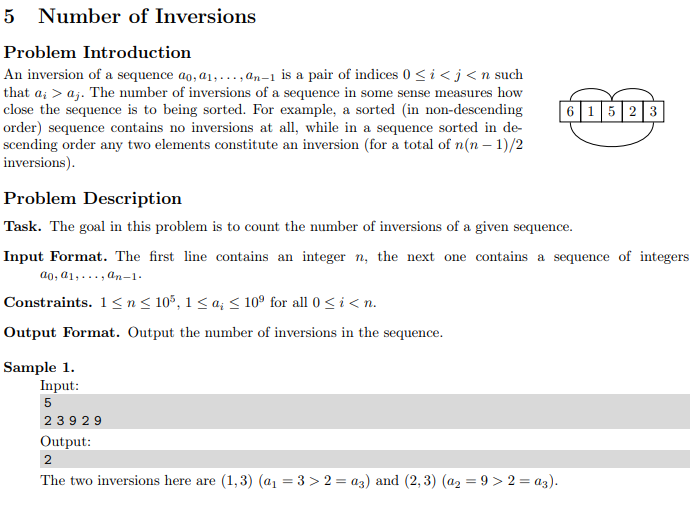

In [11]:
def merge(left, right):

    i, j, inversion_counter = 0, 0, 0
    final = list()
  
    while i < len(left) and j< len(right):
        if left[i] <= right[j]:
            final.append(left[i])
            i += 1
        else:
            final.append(right[j])
            inversion_counter += len(left) - i
            j += 1

    final += left[i:]
    final += right[j:]
        
    return final, inversion_counter

In [12]:
def mergesort(arr):

    global tot_count

    if len(arr) <= 1:
        return arr
    
    mid = len(arr)//2
    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])

    sorted_arr, temp = merge(left, right)
    tot_count += temp

    return sorted_arr

In [13]:
tot_count = 0
n = 5
seq = [2, 3, 9, 2, 9]
mergesort(seq)
print(tot_count)

2


# **7. Closest Points**

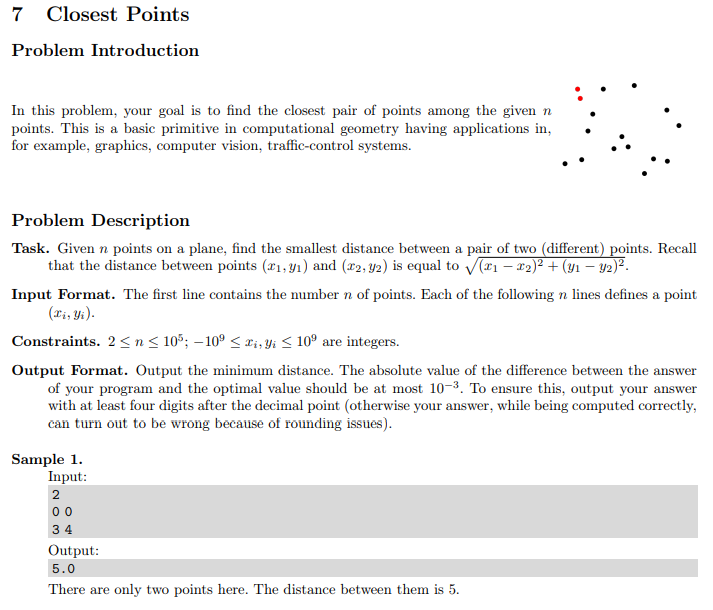

In [1]:
import math

In [2]:
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [3]:
def closestSplitPair(p_x, p_y, delta, best_pair):
    ln_x = len(p_x)
    mx_x = p_x[ln_x // 2][0]  

    s_y = [x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]

    best = delta  
    ln_y = len(s_y)  

    for i in range(ln_y - 1):
        for j in range(i+1, min(i + 5, ln_y)):  
            p, q = s_y[i], s_y[j]
            dst = dist(p, q)

            if dst < best:
                best_pair = p, q
                best = dst
                
    return best_pair[0], best_pair[1], best

In [4]:
def brute(ax):
    mi = dist(ax[0], ax[1])
    p1 = ax[0]
    p2 = ax[1]
    ln_ax = len(ax)
    if ln_ax == 2:
        return p1, p2, mi
    for i in range(ln_ax-1):
        for j in range(i + 1, ln_ax):
            if i != 0 and j != 1:
                d = dist(ax[i], ax[j])
                if d < mi: 
                    mi = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, mi

In [5]:
def closestPair(ax, ay):
    ln_ax = len(ax)  
    if ln_ax <= 3:
        return brute(ax)  
    mid = ln_ax // 2  
    Qx = ax[:mid]  
    Rx = ax[mid:]

    midpoint = ax[mid][0]
    Qy = list()
    Ry = list()
    for x in ay:  
        if x[0] < midpoint:
           Qy.append(x)
        else:
           Ry.append(x)
    (p1, q1, mi1) = closestPair(Qx, Qy)
    (p2, q2, mi2) = closestPair(Rx, Ry)

    if mi1 <= mi2:
        d = mi1
        mn = (p1, q1)
    else:
        d = mi2
        mn = (p2, q2)


    (p3, q3, mi3) = closestSplitPair(ax, ay, d, mn)

    if d <= mi3:
        return mn[0], mn[1], d
    else:
        return p3, q3, mi3

In [6]:
def solution(a):
    ax = sorted(a, key=lambda x: x[0])  
    ay = sorted(a, key=lambda x: (x[1], x[0]))  
    p1, p2, mi = closestPair(ax, ay)  
    return mi

In [9]:
n = 2
points = list()

for i in range(n):
    points.append([int(i) for i in input().split()])

print("output = ",solution(points))

0 0
3 4
output =  5.0
